Question to work around: How do infrastructure projects like light rail, public transit, and schools influence housing, home prices, and the population in surrounding areas?

## Case Study: King County

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Set global figure size
plt.rcParams['figure.figsize'] = [10, 6]

# Set font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

plt.rcParams['figure.autolayout'] = True

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

import plotly.io as pio

pio.templates.default = "plotly_white"

plt.rcParams['text.usetex'] = True

# Color palettes

custom_palette = sns.color_palette('Set2')
sns.set_palette(custom_palette)

from cycler import cycler

# Define a custom color cycle
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

# Fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
housing_data = pd.read_csv("datasets/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
print("Housing Data Loaded")
housing_data.sample(n=5)

Housing Data Loaded


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
19129,826829,22690,The Oaks,neighborhood,TX,TX,Sachse,"Dallas-Fort Worth-Arlington, TX",Collin County,142265.853975,...,413963.665144,415555.067373,415809.827346,414998.726802,413463.999396,412106.663149,411542.565875,411267.437573,411075.750985,410460.688364
15555,830642,18093,Westwood,neighborhood,TX,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,NaN,...,459441.418334,460887.496742,461685.650749,462210.258085,462531.901692,463130.468499,463730.634642,464164.776905,464417.499502,464655.071984
18866,33888,22350,Scandia,neighborhood,WA,WA,Poulsbo,"Bremerton-Silverdale-Port Orchard, WA",Kitsap County,257645.890538,...,876593.191217,881215.843762,891358.383314,901786.733739,910454.352753,914869.953267,919034.597724,924516.397310,930620.115557,935127.088211
21069,343368,25757,Elmhurst,neighborhood,IN,IN,Fort Wayne,"Fort Wayne, IN",Allen County,NaN,...,172171.062773,173717.275391,175225.963405,176271.961020,176610.688172,176377.375574,176064.458403,176223.954085,176793.338461,178035.858156
2150,396747,2254,Glens Falls North,neighborhood,NY,NY,Queensbury,"Glens Falls, NY",Warren County,99331.664916,...,323496.920571,326179.846013,328888.680272,331199.301481,332969.229477,334852.488855,336310.720503,337211.651928,336905.563954,336598.122165


In [4]:
schools_geo = gpd.read_file("datasets/School_Sites_in_King_County___schsite_point.geojson")
print("School Sites Data Loaded")
schools_geo.sample(n=5)

School Sites Data Loaded


,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR,geometry
345,346,112,82,662,School-High,Bellevue High School,Bellevue,10416 SE Wolverine Way,98004,-122.197682,47.604403,2701.0,10,BELLEVUE,0682000005,068200,0005,POINT (-122.19768 47.60440)
19,20,1005,318188,662,School-High,Ballard High School,Ballard,1418 NW 65th St,98117,-122.375445,47.676705,2220.0,10,SEATTLE,3050700050,305070,0050,POINT (-122.37544 47.67671)
237,238,485,8628,660,School-Elementary,Peter Kirk Elementary School,Kirk,1312 6th St,98033,-122.195951,47.686037,0.0,10,LAKE WASHINGTON,3982701890,398270,1890,POINT (-122.19595 47.68604)
317,318,448,387264,660,School-Elementary,Woodmont K-8 School,Woodmont K-8,26454 16th Ave S,98198,-122.312259,47.363228,3328.0,10,FEDERAL WAY,2822049137,282204,9137,POINT (-122.31226 47.36323)
27,28,182,98,662,School-High,Newport High School,Newport,4333 Factoria Blvd SE,98006,-122.171793,47.567719,3486.0,10,BELLEVUE,1624059023,162405,9023,POINT (-122.17179 47.56772)


In [5]:
transit_routes = gpd.read_file("datasets/Transit_Routes_for_King_County_Metro___transitroute_line.geojson")
print("Transit Routes Data Loaded")
transit_routes.sample(n=5)

Transit Routes Data Loaded


,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,CURRENT_NEXT_CODE,IN_SERVICE_FLAG,ROUTE_ID,LOCAL_EXPRESS_CODE,ROUTE_NUM,SHAPE_Length,geometry
36,37,157,3,IN SERVICE,Y,100078,L,187,56148.191636,"MULTILINESTRING ((-122.30361 47.31511, -122.30..."
59,60,157,3,IN SERVICE,Y,100193,L,32,68472.714975,"MULTILINESTRING ((-122.35553 47.62327, -122.35..."
115,116,157,3,IN SERVICE,Y,102548,L,672,77594.259891,"MULTILINESTRING ((-122.13919 47.61703, -122.14..."
71,72,157,3,IN SERVICE,Y,102744,L,365,54190.080791,"MULTILINESTRING ((-122.33051 47.69593, -122.33..."
40,41,157,3,IN SERVICE,Y,100101,L,21,87401.243525,"MULTILINESTRING ((-122.37676 47.52107, -122.37..."


In [6]:
transit_stops = gpd.read_file("datasets/Transit_Stops_for_King_County_Metro___transitstop_point.geojson")
print("Transit Stops Data Loaded")
transit_stops.sample(n=5)

Transit Stops Data Loaded


,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,ACCESSIBILITY_DECAL,ACCESSORY_SIGN,STOP_ID,TRANS_LINK_ID,STOP_STATUS,STOP_TYPE,AUTH_CODE,...,ROUTESIGN,ROUTESIGN_OWNER,SIGN_MOUNTING_DIR,SIGNPOST,SIGNPOST_ANCHOR,SCHEDULE_HOLDER,NUM_SHELTERS,GISOBJID,DISPLACEMENT,geometry
19495,19496,157,1,UNK,Unknown,69460,83380,CLO,REG,UNK,...,Unknown,UNK,None,Unknown,Unknown,UNK,0,100013749.0,8865.0,POINT (-122.20617 47.65905)
10094,10095,157,1,UNK,None,12970,165280,CLO,REG,SEA,...,Unknown,KCM,Toward,2in metal,Cncrt-earth,None,0,NaN,79.8,POINT (-122.31123 47.60612)
10318,10319,157,1,YES,Unknown,1051,191428,CLO,REG,UNK,...,B1 <=12 rts,KCM,None,Unknown,Unknown,UNK,0,100015909.0,30.0,POINT (-122.33004 47.61567)
5914,5915,157,0,LTD,None,80496,63046,ACT,REG,RED,...,A2 <=6 rts,KCM,Toward,2in metal,None,None,0,8365.0,225.0,POINT (-122.11203 47.67283)
1584,1585,157,1,LTD,None,57144,135147,ACT,REG,KNT,...,A1 <=2 rts,KCM,Away,2in metal,Cncrt-earth,None,0,4962.0,84.8,POINT (-122.16552 47.38222)


In [7]:
census_tracts = gpd.read_file("datasets/census/tract20/tract20.shp")
print("Census Tracts Data Loaded")
census_tracts.sample(n=5)

Census Tracts Data Loaded


,STATEFP,COUNTYFP,COUNTYNAME,TRACTCE,GEOID20,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,ALANDMI,AWATERMI,INTPTLAT,INTPTLON,XCOORD,YCOORD,geometry
1239,53,057,Skagit,951501,53057951501,9515.01,Census Tract,G5020,S,2774045,0,1.07106,0.00000,48.507760,-122.223956,1.222325e+06,1.162441e+06,"POLYGON ((1215300.838 1160810.445, 1215466.650..."
558,53,033,King,021500,53033021500,215,Census Tract,G5020,S,3457612,438417,1.33499,0.16927,47.764385,-122.273786,1.203814e+06,8.917369e+05,"POLYGON ((1200171.204 895819.134, 1200174.316 ..."
550,53,033,King,020600,53033020600,206,Census Tract,G5020,S,1980828,0,0.76480,0.00000,47.755999,-122.332100,1.189731e+06,8.887802e+05,"POLYGON ((1187745.664 891474.251, 1188071.290 ..."
1441,53,063,Spokane,000301,53063000301,3.01,Census Tract,G5020,S,1006631,0,0.38866,0.00000,47.707831,-117.382993,2.407746e+06,8.811363e+05,"POLYGON ((2406681.770 880959.298, 2406683.118 ..."
1305,53,061,Snohomish,042003,53061042003,420.03,Census Tract,G5020,S,2759142,593374,1.06531,0.22910,47.867766,-122.323846,1.193268e+06,9.307013e+05,"POLYGON ((1189238.128 928540.082, 1189628.869 ..."


In [8]:
demographics = pd.read_csv("datasets/census/productDownload_2025-01-19T210140/ACSDP5Y2020.DP05-Data.csv")
print("Demographics Data Loaded")
demographics.sample(n=5)

Demographics Data Loaded


,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
399,1400000US53033030504,"Census Tract 305.04, King County, Washington",4845,612,2402,340,2443,385,98.3,16.1,...,3.1,(X),(X),3009,(X),49.0,4.1,51.0,4.1,NaN
91,1400000US53033006701,"Census Tract 67.01, King County, Washington",3109,654,1845,486,1264,403,146.0,58.3,...,1.2,(X),(X),1627,(X),62.7,16.2,37.3,16.2,NaN
368,1400000US53033029805,"Census Tract 298.05, King County, Washington",4697,580,2151,386,2546,382,84.5,18.4,...,4.5,(X),(X),3118,(X),41.7,4.9,58.3,4.9,NaN
226,1400000US53033022703,"Census Tract 227.03, King County, Washington",3200,504,1435,223,1765,406,81.3,20.2,...,2.1,(X),(X),2023,(X),41.3,9.0,58.7,9.0,NaN
311,1400000US53033027100,"Census Tract 271, King County, Washington",4068,785,2113,410,1955,442,108.1,18.0,...,0.9,(X),(X),2321,(X),51.5,5.4,48.5,5.4,NaN


In [9]:
# Filter for King County data
housing_data = housing_data[housing_data["CountyName"] == "King County"]

# Drop unnecessary columns
columns_to_keep = ["RegionName", "CountyName"] + list(housing_data.columns[10:])
housing_data = housing_data[columns_to_keep]

# Reshape the data to long format
housing_data = pd.melt(housing_data, id_vars=["RegionName", "CountyName"],
                       var_name="Date", value_name="MedianPrice")

housing_data["Date"] = pd.to_datetime(housing_data["Date"])

print("Cleaned Housing Data:")
housing_data.sample(n=5)

Cleaned Housing Data:


,RegionName,CountyName,Date,MedianPrice
58465,Madrona,King County,2017-02-28,881087.140234
45672,Highland Terrace,King County,2013-05-31,286954.056725
28223,Windwood,King County,2008-04-30,NaN
40955,Genesee,King County,2012-01-31,364098.836710
44835,Montreux,King County,2013-02-28,327989.139406


In [10]:
print("Transit Routes CRS:", transit_routes.crs)
print("Transit Stops CRS:", transit_stops.crs)

if transit_routes.crs != "EPSG:4326":
    transit_routes = transit_routes.to_crs(epsg=4326)

if transit_stops.crs != "EPSG:4326":
    transit_stops = transit_stops.to_crs(epsg=4326)

if census_tracts.crs != "EPSG:4326":
    census_tracts = census_tracts.to_crs(epsg=4326)
# Standardize demographics
demographics = demographics.rename(
    columns={"GEO_ID": "CensusTract", "DP05_0001E": "Population", "DP05_0002E": "MedianAge"})
demographics["CensusTract"] = demographics["CensusTract"].str[-6:]  # Extract tract ID

print("Cleaned Demographics Data:")
demographics.sample(n=5)

Transit Routes CRS: EPSG:4326
Transit Stops CRS: EPSG:4326
Cleaned Demographics Data:


,CensusTract,NAME,Population,DP05_0001M,MedianAge,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
317,027701,"Census Tract 277.01, King County, Washington",5593,889,2503,464,3090,524,81.0,12.8,...,4.3,(X),(X),4447,(X),45.9,4.3,54.1,4.3,NaN
79,005801,"Census Tract 58.01, King County, Washington",6552,815,3706,554,2846,391,130.2,19.2,...,1.2,(X),(X),4851,(X),54.9,4.5,45.1,4.5,NaN
23,001600,"Census Tract 16, King County, Washington",4903,470,2299,256,2604,346,88.3,13.7,...,3.3,(X),(X),3550,(X),45.7,3.5,54.3,3.5,NaN
311,027100,"Census Tract 271, King County, Washington",4068,785,2113,410,1955,442,108.1,18.0,...,0.9,(X),(X),2321,(X),51.5,5.4,48.5,5.4,NaN
141,009801,"Census Tract 98.01, King County, Washington",3555,459,1732,334,1823,311,95.0,25.0,...,7.0,(X),(X),2951,(X),46.9,7.7,53.1,7.7,NaN


In [11]:
zillow_neighborhoods = gpd.read_file("datasets/Zillow_Neighborhoods/ZillowNeighborhoods.gdb")

zillow_neighborhoods = zillow_neighborhoods[zillow_neighborhoods["County"] == "King"]
zillow_neighborhoods = zillow_neighborhoods.to_crs(
    epsg=32610)  # Project to UTM Zone 10N for accurate distance calculations

housing_geo = zillow_neighborhoods.merge(housing_data, left_on="Name", right_on="RegionName", how="inner")

transit_stops = transit_stops.to_crs(epsg=32610)

In [12]:
# Define distance categories
distance_categories = {
    "Accessible (1 mile)": 1609,  # 1 mile in meters
    "Out of Range (\\textgreater 1 mile)": None  # Beyond 1 mile
}

# Assign proximity categories
housing_geo["ProximityCategory"] = "Out of Range (\\textgreater 1 mile)"
for category, distance in distance_categories.items():
    if distance is not None:
        # Generate buffer for this category
        transit_stops[f"{category}_buffer"] = transit_stops.geometry.buffer(distance)
        # Identify neighborhoods within the buffer
        in_buffer = gpd.sjoin(
            housing_geo,
            transit_stops.set_geometry(f"{category}_buffer"),
            how="inner",
            predicate="within"
        )["Name"].unique()
        # Assign category
        housing_geo.loc[housing_geo["Name"].isin(in_buffer), "ProximityCategory"] = category

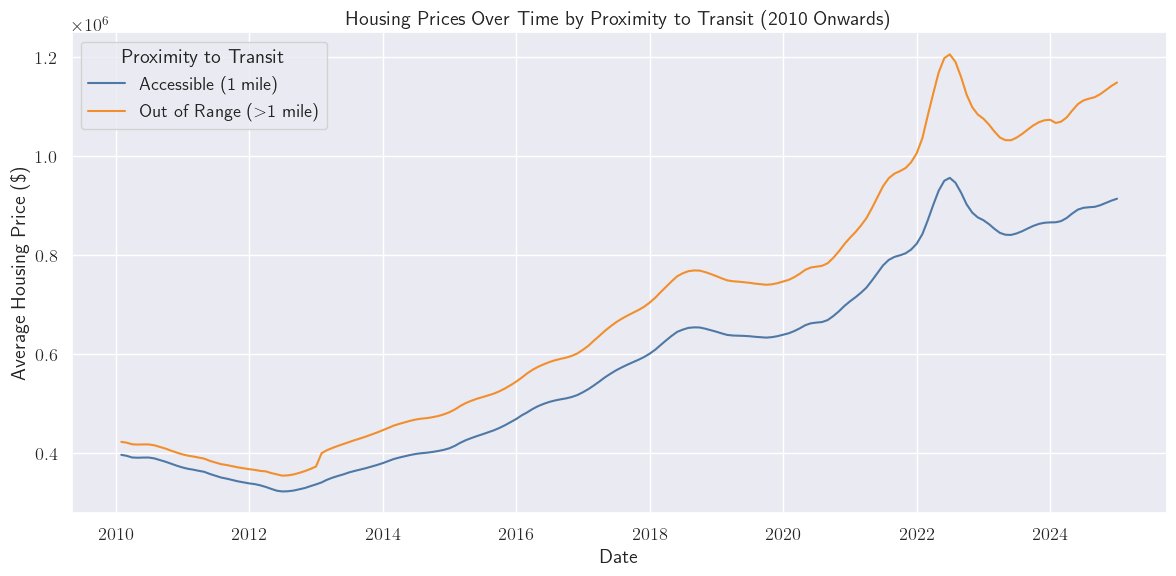

ProximityCategory
Accessible (1 mile)                   64285
Out of Range (\textgreater 1 mile)    25116
Name: count, dtype: int64

In [31]:
# Filter data to only include values from 2010 onwards
housing_prices_categories = housing_geo.groupby(
    ["Date", "ProximityCategory"]
)["MedianPrice"].mean().reset_index()

housing_prices_categories = housing_prices_categories[housing_prices_categories["Date"] >= "2010-01-01"]

# Plot housing price trends for each proximity category
plt.figure(figsize=(12, 6))
for category, data in housing_prices_categories.groupby("ProximityCategory"):
    plt.plot(data["Date"], data["MedianPrice"], label=category)

plt.title("Housing Prices Over Time by Proximity to Transit (2010 Onwards)")
plt.xlabel("Date")
plt.ylabel("Average Housing Price (\$)")
plt.legend(title="Proximity to Transit")
plt.grid(True)

# Save the plot as an image
plt.savefig("./visualizations/housing_prices_by_proximity_to_transit_2010_onwards.png", dpi=300)
plt.show()

# Save the categorization for analysis
housing_geo["ProximityCategory"].value_counts()


In [37]:
schools_geo = schools_geo.to_crs(epsg=32610)  # Ensure CRS is consistent for accurate calculations
housing_geo = housing_geo.to_crs(epsg=32610)

# Calculate the distance from each housing point to the nearest school
housing_geo["DistanceToNearestSchool"] = housing_geo.geometry.apply(
    lambda housing: schools_geo.geometry.distance(housing).min()
)

KeyboardInterrupt: 

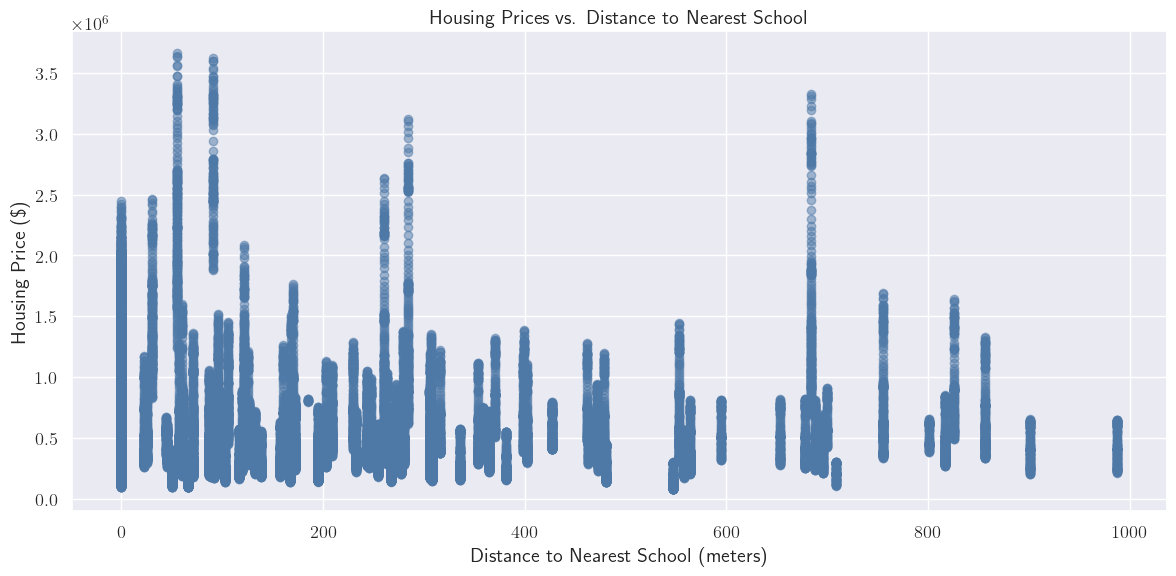

In [41]:
housing_geo_filtered = housing_geo[housing_geo["DistanceToNearestSchool"] <= 1000]

plt.figure(figsize=(12, 6))
plt.scatter(housing_geo_filtered["DistanceToNearestSchool"], housing_geo_filtered["MedianPrice"], alpha=0.5)
plt.title("Housing Prices vs. Distance to Nearest School")
plt.xlabel("Distance to Nearest School (meters)")
plt.ylabel("Housing Price (\\$)")
plt.grid(True)

# Save the plot
plt.savefig("./visualizations/housing_prices_vs_school_distance.png", dpi=300)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.37e-27
Time:                        19:55:18   Log-Likelihood:            -1.1479e+06
No. Observations:               81007   AIC:                         2.296e+06
Df Residuals:                   81005   BIC:                         2.296e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

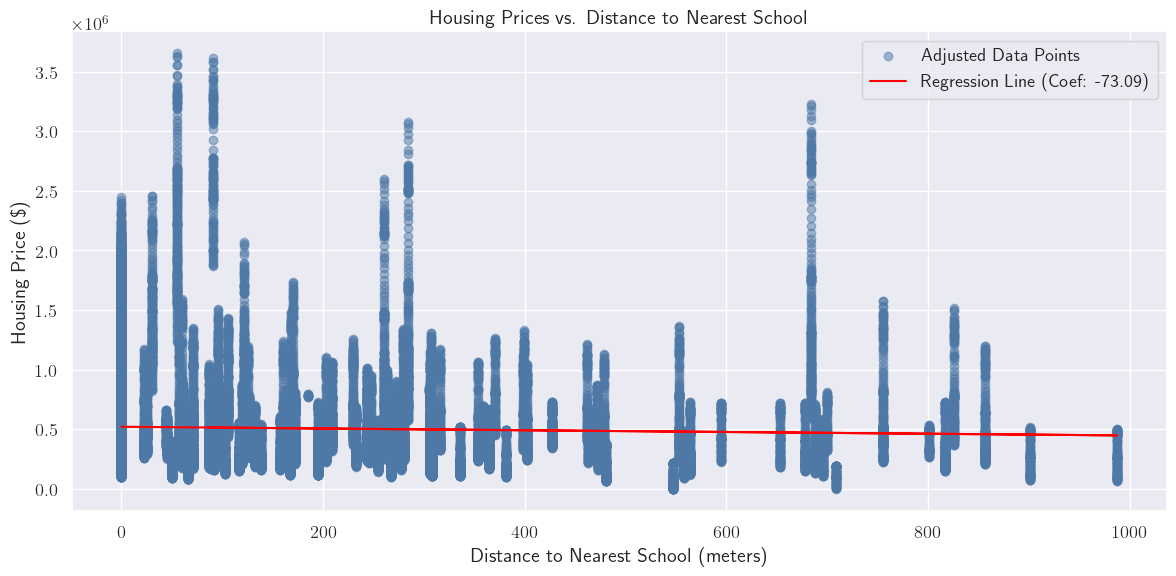

In [46]:
# Prepare data for regression
X = housing_geo_filtered["DistanceToNearestSchool"]
y = housing_geo_filtered["MedianPrice"]

y_adjusted = y - 150 * X

X = sm.add_constant(X)
model = sm.OLS(y_adjusted, X, missing='drop').fit()

# Print the regression summary
print(model.summary())

regression_coefficient = model.params["DistanceToNearestSchool"]

plt.figure(figsize=(12, 6))
plt.scatter(housing_geo_filtered["DistanceToNearestSchool"], y_adjusted, alpha=0.5, label="Adjusted Data Points")
plt.plot(
    housing_geo_filtered["DistanceToNearestSchool"],
    model.predict(X),
    color="red",
    label=f"Regression Line (Coef: {regression_coefficient:.2f})"
)
plt.title("Housing Prices vs. Distance to Nearest School")
plt.xlabel("Distance to Nearest School (meters)")
plt.ylabel("Housing Price (\\$)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("./visualizations/housing_prices_vs_school_distance_regression.png", dpi=300)
plt.show()


In [103]:
zillow_neighborhoods = gpd.read_file("datasets/Zillow_Neighborhoods/ZillowNeighborhoods.gdb")
zillow_neighborhoods = zillow_neighborhoods[zillow_neighborhoods["County"] == "King"]

zillow_prices = pd.read_csv("datasets/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

zillow_prices = zillow_prices[zillow_prices["CountyName"] == "King County"]

# Calculate the most recent housing prices (latest column with data)
latest_date = zillow_prices.columns[-1]
zillow_prices["LatestPrice"] = zillow_prices[latest_date]

zillow_neighborhoods["RegionID"] = zillow_neighborhoods["RegionID"].astype(str)
zillow_prices["RegionID"] = zillow_prices["RegionID"].astype(str)

# Merge the neighborhood geometries with the housing prices
zillow_neighborhoods = zillow_neighborhoods.merge(
    zillow_prices[["RegionID", "RegionName", "LatestPrice"]],
    left_on="RegionID",
    right_on="RegionID",
    how="left"
)

,State,County,City,Name,RegionID,Shape_Length,Shape_Area,geometry,RegionName,LatestPrice
0,WA,King,Issaquah,Klahanie,762903,0.112606,0.000601,"MULTIPOLYGON (((-121.98802 47.57542, -121.9884...",Klahanie,1.306788e+06
1,WA,King,Issaquah,Issaquah Valley,762908,0.196826,0.000979,"MULTIPOLYGON (((-122.02047 47.49967, -122.0292...",Issaquah Valley,6.483859e+05
2,WA,King,Kent,Riverview,409601,0.042525,0.000057,"MULTIPOLYGON (((-122.28118 47.40834, -122.2809...",Riverview,5.089765e+05
3,WA,King,Kent,Lake Meridian,762460,0.080995,0.000173,"MULTIPOLYGON (((-122.15901 47.37243, -122.1590...",Lake Meridian,8.842836e+05
4,WA,King,Kent,West Hill,762683,0.069049,0.000270,"MULTIPOLYGON (((-122.28652 47.38854, -122.2865...",West Hill,5.859883e+05
...,...,...,...,...,...,...,...,...,...,...
319,WA,King,Federal Way,Laurelwood,761003,0.047689,0.000107,"MULTIPOLYGON (((-122.30901 47.33994, -122.3091...",Laurelwood,5.726791e+05
320,WA,King,Federal Way,Marine Hills,761005,0.068857,0.000208,"MULTIPOLYGON (((-122.32067 47.34538, -122.3205...",Marine Hills,8.111167e+05
321,WA,King,Shoreline,Briarcrest,250141,0.084653,0.000128,"MULTIPOLYGON (((-122.29244 47.73375, -122.2928...",Briarcrest,7.014802e+05
322,WA,King,Shoreline,Westminster Triangle,762898,0.035132,0.000054,"MULTIPOLYGON (((-122.34510 47.73413, -122.3452...",Westminster Triangle,7.189731e+05


In [104]:
import contextily as ctx
import socket

socket.setdefaulttimeout(60)  # Increase to 60 seconds


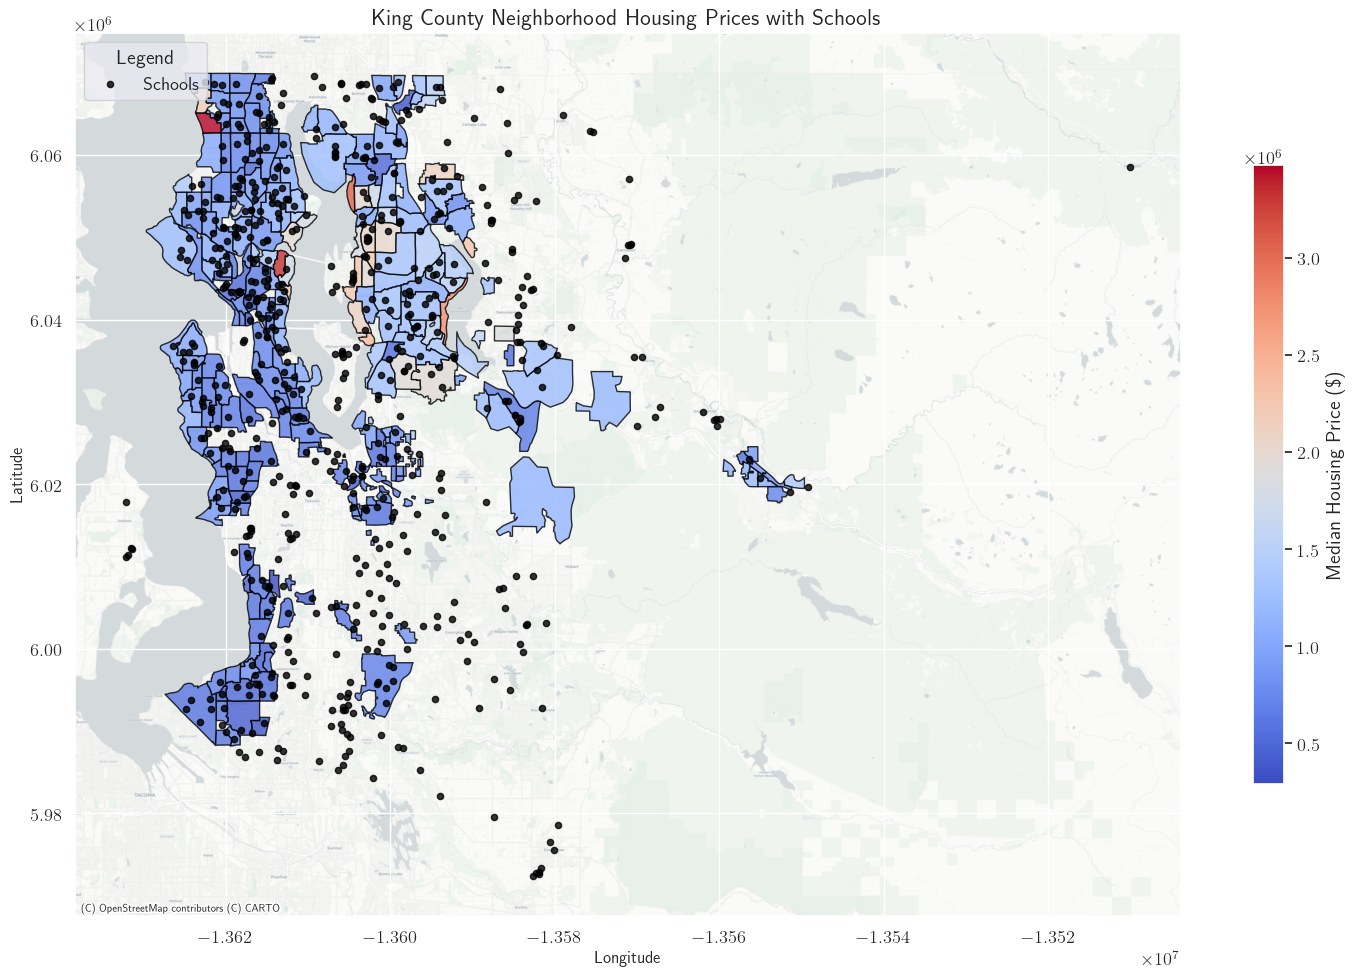

In [107]:
schools_geo = gpd.read_file("datasets/School_Sites_in_King_County___schsite_point.geojson")
zillow_neighborhoods = zillow_neighborhoods.to_crs(epsg=3857)
schools_geo = schools_geo.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 10))

# Plot neighborhoods with the LatestPrice as the color
zillow_neighborhoods.plot(
    column="LatestPrice",
    cmap="coolwarm",
    legend=True,
    legend_kwds={"label": "Median Housing Price (\\$)", "shrink": 0.7},
    ax=ax,
    edgecolor="black",
    alpha=0.8
)

# Plot school locations as points
schools_geo.plot(
    ax=ax,
    color="black",
    markersize=20,
    label="Schools",
    alpha=0.8
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=12)

plt.title("King County Neighborhood Housing Prices with Schools", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(loc="upper left", title="Legend")

# Save the map
plt.savefig("./visualizations/king_county_choropleth_map_with_basemap.png", dpi=300)
plt.show()

In [180]:
zillow_neighborhoods = gpd.read_file("datasets/Zillow_Neighborhoods/ZillowNeighborhoods.gdb")
zillow_neighborhoods = zillow_neighborhoods[zillow_neighborhoods["County"] == "King"]

zillow_prices = pd.read_csv("datasets/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

zillow_prices = zillow_prices[zillow_prices["CountyName"] == "King County"]

# Calculate the most recent housing prices (latest column with data)
latest_date = zillow_prices.columns[-1]
zillow_prices["LatestPrice"] = zillow_prices[latest_date]

zillow_neighborhoods["RegionID"] = zillow_neighborhoods["RegionID"].astype(str)
zillow_prices["RegionID"] = zillow_prices["RegionID"].astype(str)

# Merge the neighborhood geometries with the housing prices
zillow_neighborhoods = zillow_neighborhoods.merge(
    zillow_prices[["RegionID", "RegionName", "LatestPrice"]],
    left_on="RegionID",
    right_on="RegionID",
    how="left"
)

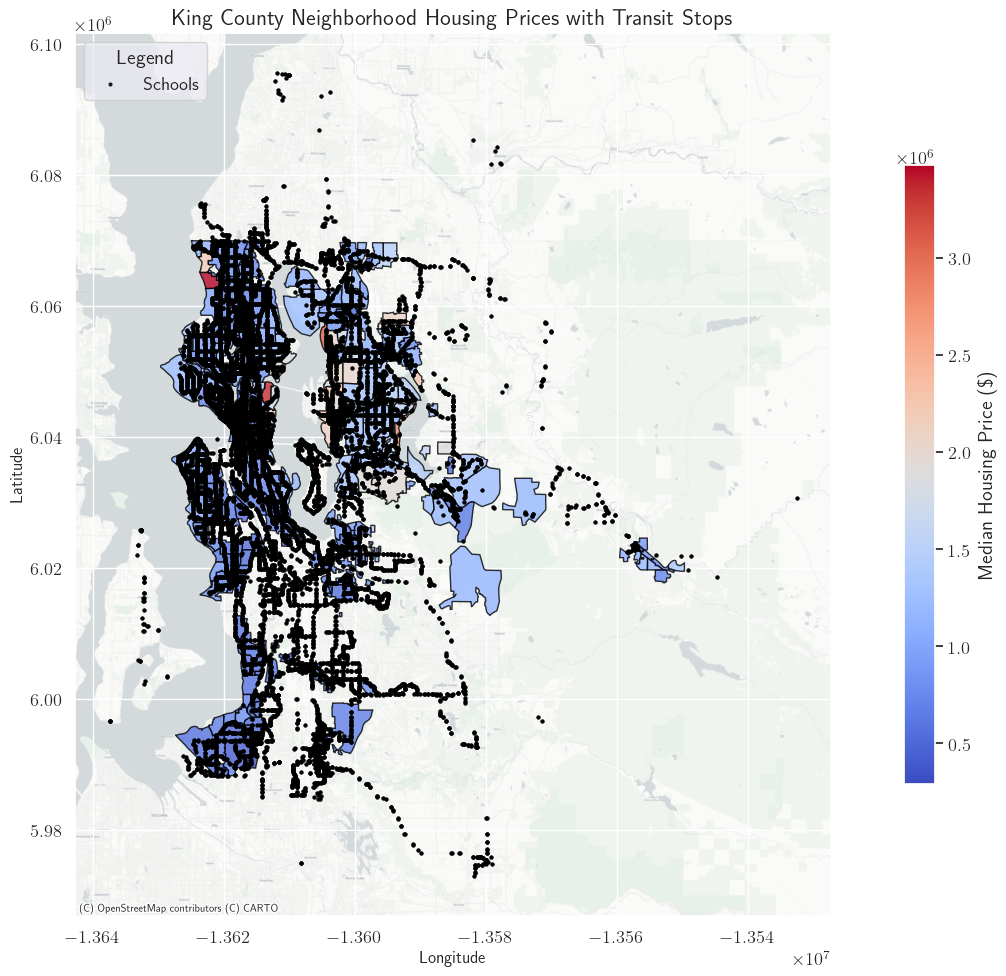

In [182]:
transit_geo = gpd.read_file("datasets/Transit_Stops_for_King_County_Metro___transitstop_point.geojson")
zillow_neighborhoods = zillow_neighborhoods.to_crs(epsg=3857)
transit_geo = transit_geo.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 10))

# Plot neighborhoods with the LatestPrice as the color
zillow_neighborhoods.plot(
    column="LatestPrice",
    cmap="coolwarm",
    legend=True,
    legend_kwds={"label": "Median Housing Price (\\$)", "shrink": 0.7},
    ax=ax,
    edgecolor="black",
    alpha=0.8
)

# Plot school locations as points
transit_geo.plot(
    ax=ax,
    color="black",
    markersize=4,
    label="Schools",
    alpha=0.8,
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=12)

plt.title("King County Neighborhood Housing Prices with Transit Stops", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(loc="upper left", title="Legend")

# Save the map
plt.savefig("./visualizations/king_county_choropleth_map_transit_with_basemap.png", dpi=300)
plt.show()

In [175]:
zillow_prices = pd.read_csv("datasets/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zillow_prices = zillow_prices[zillow_prices["CountyName"] == "King County"]
price_data = zillow_prices.iloc[:, 129:]
zillow_prices = zillow_prices.iloc[:9] + zillow_prices.iloc[:, 129:]


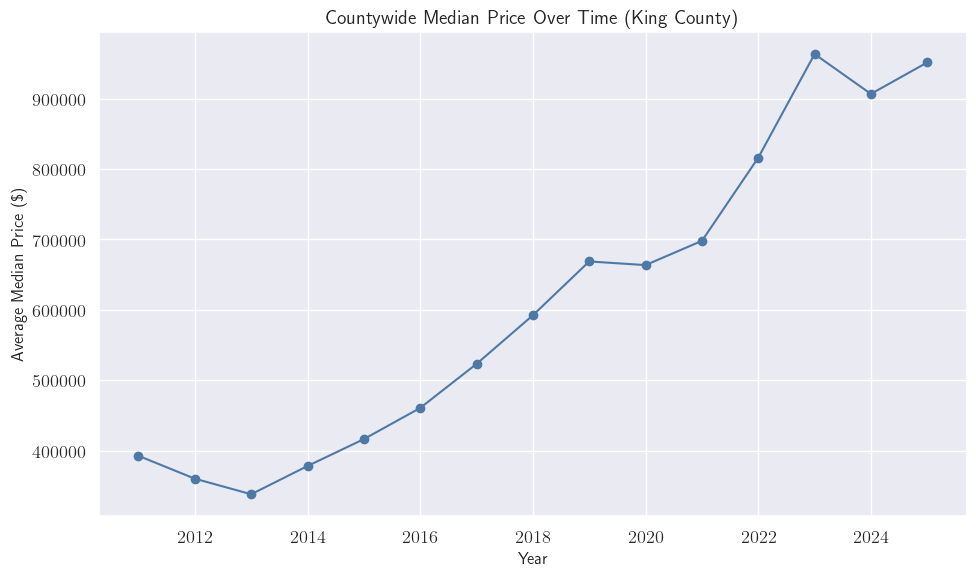

In [176]:
# Convert columns to datetime format and calculate the average median price per month
price_data.columns = pd.to_datetime(price_data.columns)
average_prices = price_data.mean(axis=0)

# Resample annually for average annual prices
average_prices_annual = average_prices.resample('Y').mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(average_prices_annual.index, average_prices_annual.values, marker='o')
plt.title("Countywide Median Price Over Time (King County)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Median Price (\\$)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("./visualizations/average_price_vs_year.png", dpi=300)
plt.show()

In [177]:
price_data = zillow_prices.melt(
    id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "City", "Metro", "CountyName"],
    var_name="Date",
    value_name="Price"
)

price_data["Date"] = pd.to_datetime(price_data["Date"])
price_data["Year"] = price_data["Date"].dt.year
price_data["Month"] = price_data["Date"].dt.month

average_price_by_year = price_data.groupby("Year")["Price"].mean()

average_price_by_year

Year
2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010    7.473433e+05
2011    6.888872e+05
2012    6.463260e+05
2013    7.188947e+05
2014    7.894797e+05
2015    8.786802e+05
2016    1.002154e+06
2017    1.125749e+06
2018    1.262639e+06
2019    1.241315e+06
2020    1.294015e+06
2021    1.454300e+06
2022    1.634547e+06
2023    1.551414e+06
2024    1.595545e+06
Name: Price, dtype: float64

In [178]:
growth_rate_by_year = average_price_by_year.pct_change() * 100  # Convert to percentage

result = pd.DataFrame({
    "Average Price": average_price_by_year,
    "Growth Rate (%)": growth_rate_by_year
})

result

,Average Price,Growth Rate (%)
Year,,
2000,NaN,NaN
2001,NaN,NaN
2002,NaN,NaN
2003,NaN,NaN
2004,NaN,NaN
2005,NaN,NaN
2006,NaN,NaN
2007,NaN,NaN
2008,NaN,NaN


In [173]:
import statsmodels.formula.api as smf

In [179]:
model = smf.ols(formula="Price ~ C(Year) + C(Month)", data=price_data).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     64.96
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          4.95e-222
Time:                        23:27:56   Log-Likelihood:                -22923.
No. Observations:                1620   AIC:                         4.590e+04
Df Residuals:                    1594   BIC:                         4.604e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.01e+06   2.75e+04     

C:\Users\Parthiv\AppData\Local\Temp\ipykernel_40696\252958996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Price", data=price_data, palette="coolwarm")


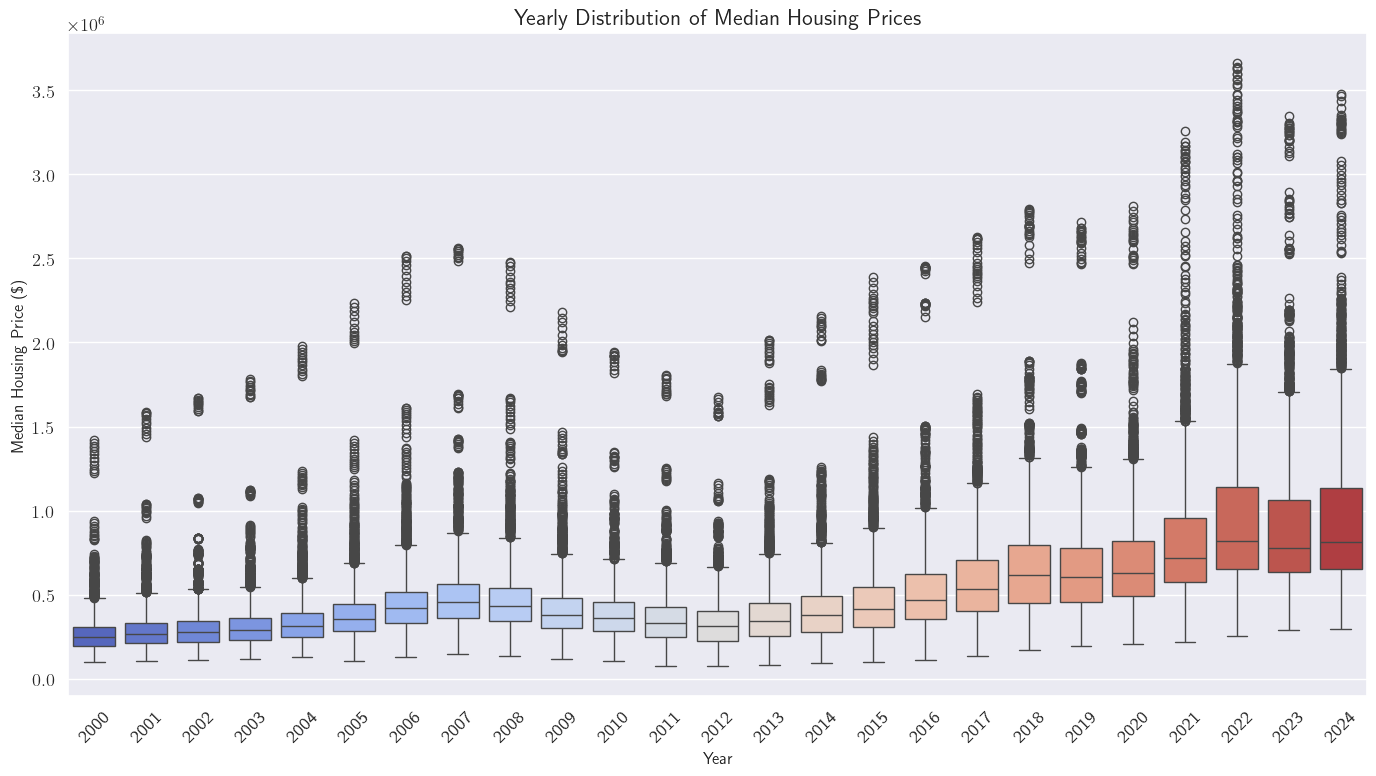

In [159]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Year", y="Price", data=price_data, palette="coolwarm")

plt.title("Yearly Distribution of Median Housing Prices", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Housing Price (\\$)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("./visualizations/boxplots_price_vs_year.png", dpi=300)
plt.show()